### Practice Exam Problem 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
%matplotlib inline

a, b, c, d, x, y, r = symbols('a b c d x y r')

### Problem 
Consider the following predator-prey model, with $x$ being the population size of prey and $y$ of predators (such that $x \geq 0$ $y \geq 0$) and $a$, $b$, $c$ and $d$ are positive parameters.

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

Please answer the following questions:
1. Explain what each term on the right hand sides represents.
2. Find the equilibrium points.
3. Calculate the Jacobian matrix of the model.
4. Conduct linear stability analysis for each of the equilibrium points, and discuss the conditions (regarding the parameter values of a, b, c and d) under which they are stable/unstable.
5. Identify the parameter setting at which a bifurcation occurs.

### Parameter Analysis 

As defined, $\frac{dx}{dt}$ represents the change in the population of prey as a function of time. In this model, the quantity $\frac{dx}{dt}$ can be computed by the population of the prey (i.e., $x$) _less_ the amount that the prey gets consumed by the predators (i.e., $y$). The constant $b$ represents the predator-prey interaction rate, and the constant $a$ is proportional to the amount of prey in the population.

As defined, $\frac{dy}{dt}$ represents the change in the population of the predators in the population as a function of time. In this model, the quantity $\frac{dy}{dt}$ can be computed by the _decrease_ in the population of the predators, $y$, possibly due to attrition as well as the amount of predators, $y$, that can interact with the prey, $x$. The constant $c$ represents the rate that the predators are loss, and the constant $d$ is proportional to the amount of predator-prey interaction in the population.

### Bifurcation Analysis 

To understand where does a bifurcation occur, we need to compute the eigenvalues around each eq. point. 

For the eq. point, $(0, 0)$, the resulting Jacobian matrix is:

\begin{equation}
J_{eq1} = 
    \begin{bmatrix}
    a & 0 \\
    0 & -c
    \end{bmatrix}
\end{equation}

For the eq. point, $(\frac{c}{d}, \frac{a}{b})$, the resulting Jacobian matrix is:

\begin{equation}
J_{eq2} = 
    \begin{bmatrix}
    0 & \frac{-bc}{d} \\
    \frac{ad}{b} & 0
    \end{bmatrix}
\end{equation}

Computing the eigenvalues for $J_{eq1}$ results in $\lambda_{1} = a$ and $\lambda_{2} = -c$. Computing the eigenvalues for $J_{eq2}$ results in $\lambda_{3} = -\sqrt{-ac}$ and $\lambda_{4} =  \sqrt{-ac}$.

To understand when a bifurcation occurs for $\lambda_{1}$, we need to understand when does $Re(a) = 0$? Likewise, for $\lambda_{2}$, we need to understand when does $Re(-c) = 0$? For the eigenvalues produced for $J_{eq1}$, since we are told that $a, b, c, d > 0$, there is no way for $\lambda_{1}$ or $\lambda_{2}$ to be equal to zero, therefore, the point $(0, 0)$ does not have any bifurcation points. 

For $\lambda_{3}$, we need to understand when does $Re(-\sqrt{-ac}) = 0$. Given that we're told that $a, c > 0$, $\lambda_{3}$ will have a zero real component but a complex component. Finally, for $\lambda_{4}$, we need to understand when does $Re(\sqrt{-ac}) = 0$. Given that we're told that $a, c > 0$, $\lambda_{4}$ will have a zero real component but a complex component. 

Therefore, for all values of $a, b, c, d > 0$, there is no bifurcation since $\lambda_{3}$ and $\lambda_{4}$ will have a real component that is equal to zero.

### Linear Stability Analysis

When it comes to stability, the point $(0, 0)$ is $\textit{unstable}$ since $a, b, c, d > 0$ and therefore $a > 0 \; \forall \; a$ (this point will be unstable regardless of the stability of the other eigenvalue). For the point $(\frac{c}{d}, \frac{a}{b})$, since there is a zero real component, but a complex component, that is, $0 \pm i$, this point is $\textit{neutral}$.

In [2]:
Xdot = a * x - b * y * x
Ydot = -c * y + d * y * x

In [3]:
# Find eq. points. 
solve([Xdot, Ydot], (x, y))

In [4]:
# Calculate Jacobian matrix of the model.
J = Matrix([[Xdot.diff(x), Xdot.diff(y)], 
            [Ydot.diff(x), Ydot.diff(y)]])
J

⎡a - b⋅y    -b⋅x  ⎤
⎢                 ⎥
⎣  d⋅y    -c + d⋅x⎦

In [5]:
# Conduct stability analysis around the eq. point 1.
J_eq_1 = J.subs([(x, 0), (y, 0)])
J_eq_1

⎡a  0 ⎤
⎢     ⎥
⎣0  -c⎦

In [6]:
J_eq_1.eigenvals()

In [7]:
A = np.array([[1, 2, 4], 
              [9, 1, 9], 
              [0, 0, 6]])
np.linalg.eig(A)

(array([ 5.24264069, -3.24264069,  6.        ]),
 array([[ 0.42640143, -0.42640143,  0.42342626],
        [ 0.90453403,  0.90453403,  0.90256649],
        [ 0.        ,  0.        ,  0.07799957]]))

In [8]:
J_eq_vals_1 = J_eq_1.eigenvects()
J_eq_vals_1

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡0⎤⎤⎞⎤
⎢⎜a, 1, ⎢⎢ ⎥⎥⎟, ⎜-c, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦

In [9]:
# Conduct stability analysis around the eq. point 2.
J_eq_2 = J.subs([(x, c/d), (y, a/b)])
J_eq_2

⎡     -b⋅c ⎤
⎢ 0   ─────⎥
⎢       d  ⎥
⎢          ⎥
⎢a⋅d       ⎥
⎢───    0  ⎥
⎣ b        ⎦

In [10]:
J_eq_vals_2 = J_eq_2.eigenvects()
J_eq_vals_2

⎡⎛              ⎡⎡   b⋅c    ⎤⎤⎞  ⎛             ⎡⎡  -b⋅c    ⎤⎤⎞⎤
⎢⎜              ⎢⎢──────────⎥⎥⎟  ⎜             ⎢⎢──────────⎥⎥⎟⎥
⎢⎜   ______     ⎢⎢    ______⎥⎥⎟  ⎜  ______     ⎢⎢    ______⎥⎥⎟⎥
⎢⎜-╲╱ -a⋅c , 1, ⎢⎢d⋅╲╱ -a⋅c ⎥⎥⎟, ⎜╲╱ -a⋅c , 1, ⎢⎢d⋅╲╱ -a⋅c ⎥⎥⎟⎥
⎢⎜              ⎢⎢          ⎥⎥⎟  ⎜             ⎢⎢          ⎥⎥⎟⎥
⎣⎝              ⎣⎣    1     ⎦⎦⎠  ⎝             ⎣⎣    1     ⎦⎦⎠⎦

In [11]:
def model(aconst, bconst, cconst, dconst, dt, t_not, X_not, Y_not, tdomain):

    t_results = [t_not]
    X_results = [X_not]
    Y_results = [Y_not]

    while t_results[-1] <= tdomain:

        Xdot = (aconst * X_results[-1]) - (bconst * X_results[-1] * Y_results[-1])
        Ydot = (-1 * cconst * Y_results[-1]) + (dconst * X_results[-1] * Y_results[-1])
        nx = X_results[-1]  + Xdot * dt
        ny = Y_results[-1]  + Ydot * dt
        time = t_results[-1] + dt

        t_results.append(time) 
        X_results.append(nx) 
        Y_results.append(ny) 

    results = {}
    results['time'] = t_results
    results['x'] = X_results
    results['y'] = Y_results
    
    return results

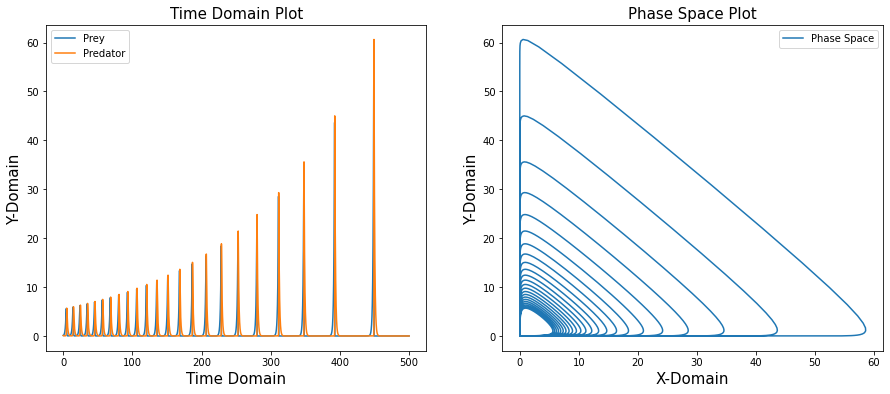

In [12]:
plt.figure(figsize=(15, 6))
run = model(aconst=1, bconst=1, cconst=1, dconst=1, dt=0.01, t_not=0, X_not=0.1, Y_not=0.1, tdomain=500)
plt.subplot(1, 2, 1)
plt.plot(run['time'], run['x'], label='Prey')
plt.plot(run['time'], run['y'], label='Predator')
plt.xlabel('Time Domain', fontsize=15)
plt.ylabel('Y-Domain', fontsize=15)
plt.title('Time Domain Plot', fontsize=15)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(run['x'], run['y'], label='Phase Space')
plt.xlabel('X-Domain', fontsize=15)
plt.ylabel('Y-Domain', fontsize=15)
plt.title('Phase Space Plot', fontsize=15)
plt.legend()
plt.show()

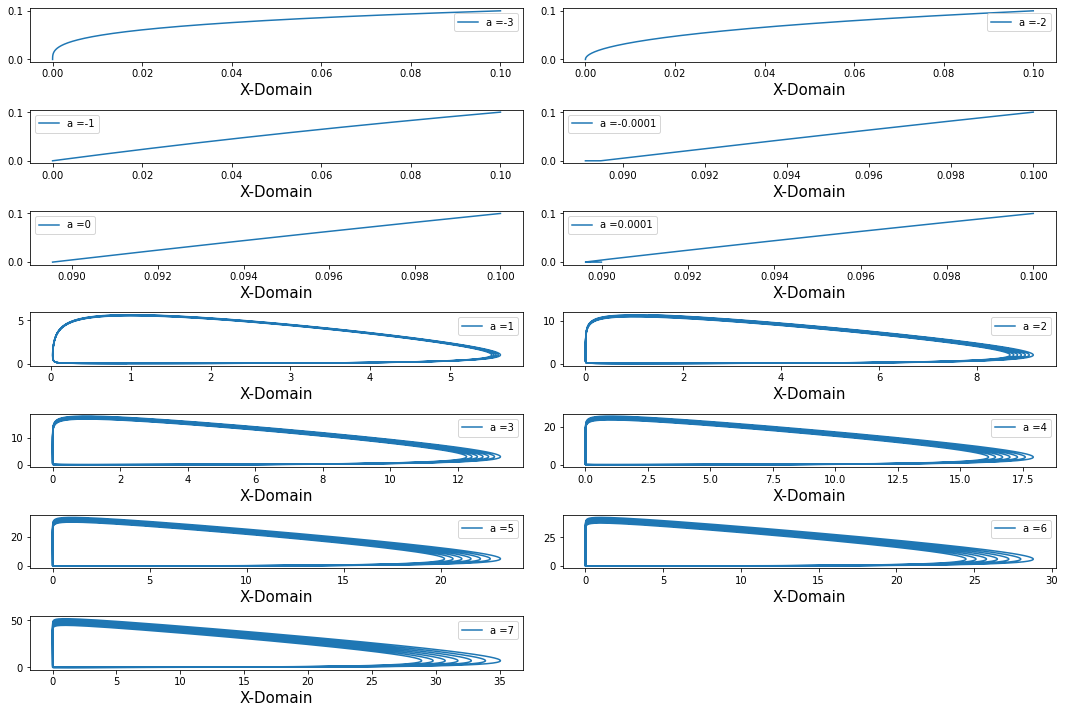

In [27]:
aconstlist = [-3, -2, -1, -0.0001, 0, 0.0001, 1, 2, 3, 4, 5, 6, 7]  
rows = (len(aconstlist) + 1) / 2
columns = 2
plt.figure(figsize=(15, 10))

for i, each in enumerate(aconstlist):
    run = model(aconst=float(each), bconst=1, cconst=1, dconst=1, dt=0.001, t_not=0, X_not=0.1, Y_not=0.1, tdomain=50)
    plt.subplot(rows, columns, i+1)
    plt.plot(run['x'], run['y'], label='a =' + str(each))
    plt.xlabel('X-Domain', fontsize=15)
    plt.legend()
plt.tight_layout()
plt.show()